https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as sns                                  
import sys      
from distfit import distfit
import pandas as pd

## Point estimates 
Point estimates are estimates of population parameters based on sample data.

In [2]:
np.random.seed(42)

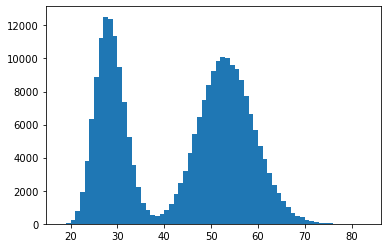

42.994644

In [13]:
#generate random numbers acording to poisson dist
pop1 = poiss_rand = stats.poisson.rvs(loc = 18,mu =35,size = 150000)
pop2 = poiss_rand = stats.poisson.rvs(loc = 18,mu =10,size = 100000)
pop_ages = np.concatenate((pop1,pop2))
plt.hist(pop_ages,bins = 65)
plt.show()
pop_ages.mean()


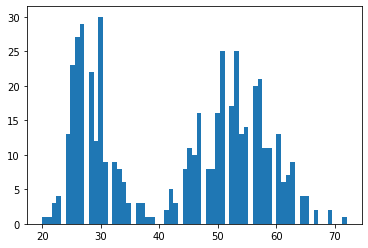

42.988

In [14]:
#choose a sample from the population 
sample = np.random.choice(pop_ages,size=500)
plt.hist(sample,bins = 65)
plt.show()
sample.mean()

In [7]:
#diference between sample and true data
pop_ages.mean() - sample.mean()


0.012320000000002551

## The Central Limit Theorem
 the distribution of many sample means, known as a sampling distribution, will be normally distributed. 

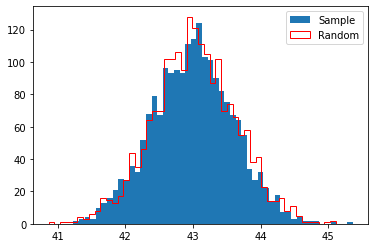

-0.0027020000000064215

In [31]:
#take the mean of samples size =500, 2000 times 
point_estimates = np.array([np.random.choice(a= pop_ages, size=500).mean() for i in range(2000)])      
random_gauss = stats.norm.rvs(pop_ages.mean(),point_estimates.std(),size=2000)
plt.hist(point_estimates, bins =50,label='Sample')
plt.hist(random_gauss,bins = 50,histtype='step',color = 'r',label='Random')
plt.legend()
plt.show()
pop_ages.mean() - point_estimates.mean()

## Confidence Intervals
A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. 

If you know the standard deviation of the population, the margin of error is equal to:


$\frac{z\sigma}{\sqrt{n}}$

In [34]:
#example
#take a sample 
sample_size = 1000
sample = np.random.choice(a= pop_ages, size = sample_size)
sample_mean = sample.mean()

#z value could be 2 but the blolow is more precise 
z_critical = stats.norm.ppf(q = 0.975)  # 2 std is .95 +.25(right and left)
print("z-critical value:")              # Check the z-critical value
print(z_critical)              

#calculation
pop_stdev = pop_ages.std() 
margin_of_error = z_critical * (pop_stdev/np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.882349343431954, 43.52165065656804)


In [37]:
sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    #create samples 
    sample = np.random.choice(a= pop_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    #calculate z
    z_critical = stats.norm.ppf(q = 0.975)       
    
    #confidence interval calculation
    pop_stdev = pop_ages.std() 
    margin_of_error = z_critical * (pop_stdev/np.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)


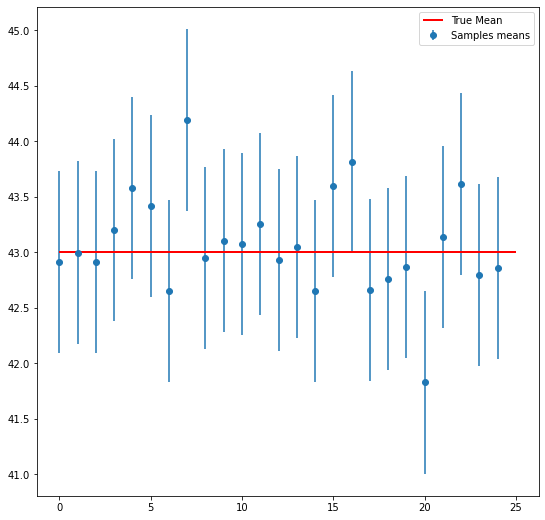

In [48]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o',label='Samples means')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red",label='True Mean')
plt.legend()
plt.show()

In [39]:
np.arange(0.1, 25, 1)

array([ 0.1,  1.1,  2.1,  3.1,  4.1,  5.1,  6.1,  7.1,  8.1,  9.1, 10.1,
       11.1, 12.1, 13.1, 14.1, 15.1, 16.1, 17.1, 18.1, 19.1, 20.1, 21.1,
       22.1, 23.1, 24.1])

### T-distribution
If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value.

In [57]:
#small sample 
sample_size = 25
sample = np.random.choice(a= pop_ages, size = sample_size)
sample_mean = sample.mean()

#get ppf of t distribution aprox 2
t_critical = stats.t.ppf(q = 0.975, df=24)  

print("t-critical value:")            
print(t_critical)                        

#calculation
sample_stdev = sample.std(ddof=1)  
sigma = sample_stdev/np.sqrt(sample_size)  
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error) 
print("Confidence interval:")
print(f'True Mean = {pop_ages.mean()}, with a 95% confidence interval ={confidence_interval}')

t-critical value:
2.0638985616280205
Confidence interval:
True Mean = 42.994644, with a 95% confidence interval =(38.989920522706484, 50.13007947729352)


In [59]:
#using scipy t interval 
conf = 0.95
dfred = sample_size -1
stats.t.interval(alpha = 0.95,df= 24,loc = sample_mean,scale = sigma) 

(38.989920522706484, 50.13007947729352)

### Population Portion
$z*\sqrt{\frac{p(1-p)}{n}}$
<br> Where z is the z-critical value for our confidence level, p is the point estimate of the population proportion and n is the sample size.

In [65]:
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = np.random.choice(population_races, 1000)   

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( len(demo_sample[demo_sample==race])/1000 )

white proportion estimate:
0.406
asian proportion estimate:
0.099
other proportion estimate:
0.101
hispanic proportion estimate:
0.199
black proportion estimate:
0.195


In [66]:
#hispanic poulation
z_critical = stats.norm.ppf(0.975)
#point estimate 
p = 0.199
#sample size 
n = 1000    
#calculation
margin_of_error = z_critical * np.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval


(0.17425480461665693, 0.2237451953833431)

In [68]:
#using stats norm interval 
stats.norm.interval(alpha = 0.95,loc =  0.199,scale = np.sqrt((p*(1-p))/n)) 

(0.17425480461665693, 0.2237451953833431)